# Allgemein

- Common Voice Delta Segmente 20 und 21
- Datum 2025-09-08  
- Datensatz: `features_wer_de_20_21.csv`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# CSV laden
df = pd.read_csv("../../results/de-20-21-delta/features_wer_de_20_21.csv")
df.head(5)

,filename,filepath,rms,log_energy,clipping_ratio,crest_factor,snr,hnr,f0,phoneme_entropy,...,mfcc_stat_85,mfcc_stat_86,mfcc_stat_87,mfcc_stat_88,mfcc_stat_89,mfcc_stat_90,mfcc_stat_91,reference,hypothesis,wer
0,common_voice_de_42419860.mp3,audio_files/common_voice/raw/cv-corpus-de-comb...,0.108043,6.868494,0.000012,9.255603,23.091285,14.075016,116.345190,5.936791,...,-0.521129,-0.460102,0.967285,-0.034531,1.705633,-0.460891,0.374009,Durch das Schließen des Fensters soll das Zimm...,Durch das Schließen des Fensters soll das Zimm...,0.000000
1,common_voice_de_42420039.mp3,audio_files/common_voice/raw/cv-corpus-de-comb...,0.139491,7.276404,0.000040,7.168941,22.108545,22.668118,132.980529,5.449627,...,-0.545837,0.459565,-0.373133,1.001559,0.079690,0.627100,-0.031466,Rieben ist an den Folgen einer Krebserkrankung...,Rieben ist an den Folgen einer Krebserkrankung...,0.000000
2,common_voice_de_41918319.mp3,audio_files/common_voice/raw/cv-corpus-de-comb...,0.075979,5.883650,0.000016,13.161484,39.296978,19.178329,100.313452,6.035172,...,-0.138818,-1.106853,-0.303316,-0.036059,-0.567694,0.574045,-0.734802,Die restlichen neun Boote wurden verschrottet.,Die restlichen neuen Bote wurden verschottet.,0.500000
3,common_voice_de_41523074.mp3,audio_files/common_voice/raw/cv-corpus-de-comb...,0.108128,6.963481,0.000033,9.248268,36.609235,19.171231,94.434577,5.846815,...,0.551362,-0.732188,-0.400727,1.027973,-0.382125,0.759110,-0.575226,Die Lokomotive entgleiste und stürzte ebenfall...,Die Dokumotiventgleichs-Dun stürzte ebenfalls ...,0.416667
4,common_voice_de_41470438.mp3,audio_files/common_voice/raw/cv-corpus-de-comb...,0.084122,6.756983,0.000016,11.887547,33.106835,18.813903,110.876022,6.100836,...,-0.725997,0.274518,-0.489804,0.157069,-0.719080,-0.130046,-0.202805,In deutschen Publikationen wird oft fälschlich...,In deutschen Publikationen wird oft faszchlich...,0.083333


## Überblick & Datenqualität

In [3]:
# Überblick
print(f"Form der Daten: {df.shape[0]} Zeilen, {df.shape[1]} Spalten")

# Fehlende Werte
missing = df.isna().sum()
missing = missing[missing > 0]
if not missing.empty:
    print("\nFehlende Werte:")
    print(missing)
else:
    print("\nKeine fehlenden Werte.")

# Unendliche Werte
infinite = df.isin([np.inf, -np.inf]).sum()
infinite = infinite[infinite > 0]
if not infinite.empty:
    print("\nUnendliche Werte:")
    print(infinite)
else:
    print("\nKeine unendlichen Werte.")

Form der Daten: 9472 Zeilen, 114 Spalten

Fehlende Werte:
phoneme_entropy    450
hypothesis           1
dtype: int64

Keine unendlichen Werte.


## Grundlegende Statistik

In [4]:
# Grundlegende Statistik
df_overview = df.drop(columns=[col for col in df.columns if col.startswith("mfcc_stat_") or col.startswith("chroma_")])
df_overview.describe().T

,count,mean,std,min,25%,50%,75%,max
rms,9472.0,0.104615,0.027697,0.024598,0.085682,0.101977,0.120609,0.363774
log_energy,9472.0,6.814579,0.583858,4.023183,6.440919,6.826876,7.211589,9.847092
clipping_ratio,9472.0,0.000054,0.000092,0.000005,0.000017,0.000030,0.000053,0.001486
crest_factor,9472.0,10.243401,2.832315,2.748958,8.291264,9.806180,11.671014,40.653976
snr,9472.0,32.781214,22.025256,-9.037806,21.439558,32.044455,38.738262,377.825813
hnr,9472.0,19.594328,3.939527,2.339917,17.065166,19.462414,21.979086,39.920342
f0,9472.0,120.195177,34.926001,0.000000,104.085434,115.309438,128.868272,293.147991
phoneme_entropy,9022.0,5.750692,0.443860,2.992785,5.476428,5.767328,6.026548,7.500970
rt60_reverberation,9472.0,3.913583,1.544332,0.316875,2.853500,3.726750,4.725750,20.089500
spectral_bandwidth,9472.0,1648.720198,189.046520,626.205633,1548.095006,1653.584951,1763.756162,2385.164484


# WER

In [5]:
feature = "wer"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean        0.308497
std         0.311647
min         0.000000
25%         0.111111
50%         0.250000
75%         0.428571
max        10.400000
Name: wer, dtype: float64


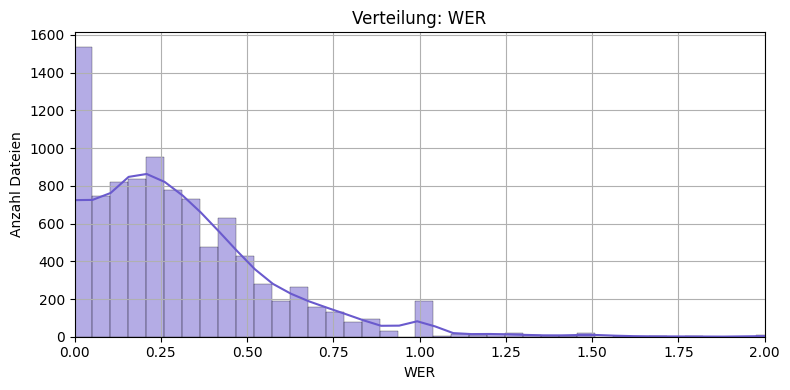

In [6]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature], bins=200, kde=True, color="slateblue")
plt.title("Verteilung: WER")
plt.xlabel("WER")
plt.ylabel("Anzahl Dateien")
plt.xlim(0,2)
plt.grid(True)
plt.tight_layout()
plt.show()

# Einzelne Features

## 01 Chroma Features

In [7]:
feature = "clipping_ratio"
chroma_cols = [f"chroma_{i}" for i in range(1, 13)]

for col in chroma_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=50, kde=True, color="mediumslateblue")
    plt.title(f"Verteilung von {col}")
    plt.xlabel(col)
    plt.ylabel("Anzahl")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

KeyError: 'chroma_1'

<Figure size 600x300 with 0 Axes>

In [7]:
df[chroma_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
chroma_1,25093.0,0.418868,0.096925,0.072388,0.353047,0.416661,0.481161,0.907245
chroma_2,25093.0,0.405715,0.094078,0.082683,0.341145,0.405253,0.466919,0.849316
chroma_3,25093.0,0.397587,0.094013,0.081541,0.332846,0.398022,0.460501,0.955651
chroma_4,25093.0,0.397809,0.095637,0.094925,0.332011,0.397890,0.461976,0.869575
chroma_5,25093.0,0.396157,0.094278,0.078032,0.331941,0.395937,0.458811,0.824141
chroma_6,25093.0,0.405379,0.096800,0.062187,0.340069,0.403958,0.469998,0.890964
chroma_7,25093.0,0.423473,0.099609,0.074391,0.356526,0.421974,0.489228,0.866461
chroma_8,25093.0,0.438474,0.097959,0.080634,0.371683,0.437455,0.503872,0.909687
chroma_9,25093.0,0.453344,0.096272,0.070914,0.387321,0.452999,0.518344,0.942469
chroma_10,25093.0,0.461977,0.097780,0.085128,0.397059,0.461962,0.526331,0.889135


## 02 Clipping Ratio

In [8]:
feature = "clipping_ratio"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(f"Anzahl potenzieller Ausreißer in {feature}: {np.sum(df[feature] > (df[feature].quantile(0.75) + 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25)) ))}")

df[feature].describe()

Fehlende Werte: 0
Anzahl potenzieller Ausreißer in clipping_ratio: 845


count    9472.000000
mean        0.000054
std         0.000092
min         0.000005
25%         0.000017
50%         0.000030
75%         0.000053
max         0.001486
Name: clipping_ratio, dtype: float64

## 03 Crest Factor

In [9]:
feature = "crest_factor"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
df[feature].describe()

Fehlende Werte: 0


count    9472.000000
mean       10.243401
std         2.832315
min         2.748958
25%         8.291264
50%         9.806180
75%        11.671014
max        40.653976
Name: crest_factor, dtype: float64

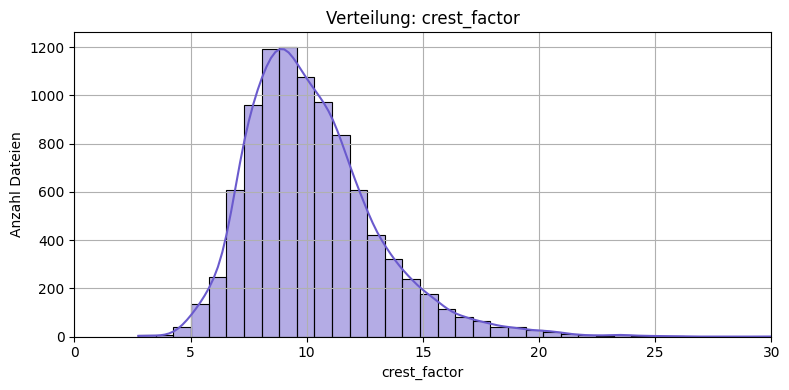

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature], bins=50, kde=True, color="slateblue")
plt.title("Verteilung: crest_factor")
plt.xlabel("crest_factor")
plt.ylabel("Anzahl Dateien")
plt.xlim(0,30)
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in f0: {len(outliers)}")
print(f"Minimum: {df[feature].min():.2f}")
print(f"Maximum: {df[feature].max():.2f}")

Potenzielle Ausreißer in f0: 271
Minimum: 2.75
Maximum: 40.65


## 04 Fudamental Frequency (f0)

In [12]:
feature = "f0"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean      120.195177
std        34.926001
min         0.000000
25%       104.085434
50%       115.309438
75%       128.868272
max       293.147991
Name: f0, dtype: float64


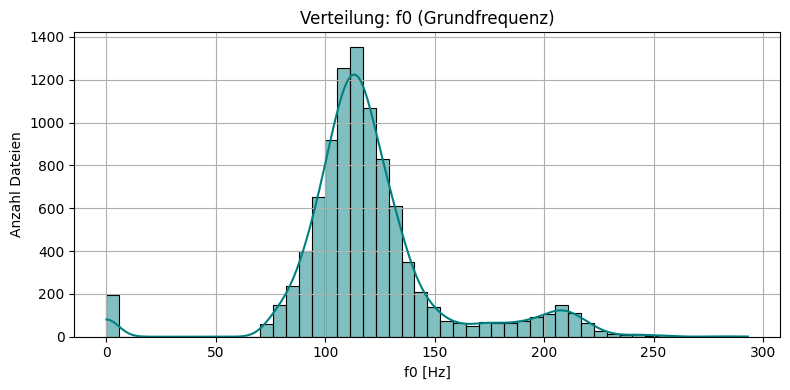

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature].dropna(), bins=50, kde=True, color="teal")
plt.title("Verteilung: f0 (Grundfrequenz)")
plt.xlabel("f0 [Hz]")
plt.ylabel("Anzahl Dateien")
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in f0: {len(outliers)}")
print(f"Minimum: {df[feature].min():.2f}")
print(f"Maximum: {df[feature].max():.2f}")

Potenzielle Ausreißer in f0: 1099
Minimum: 0.00
Maximum: 293.15


## 05 Harmonics-to-Noise Ratio (HNR)

In [15]:
feature = "hnr"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean       19.594328
std         3.939527
min         2.339917
25%        17.065166
50%        19.462414
75%        21.979086
max        39.920342
Name: hnr, dtype: float64


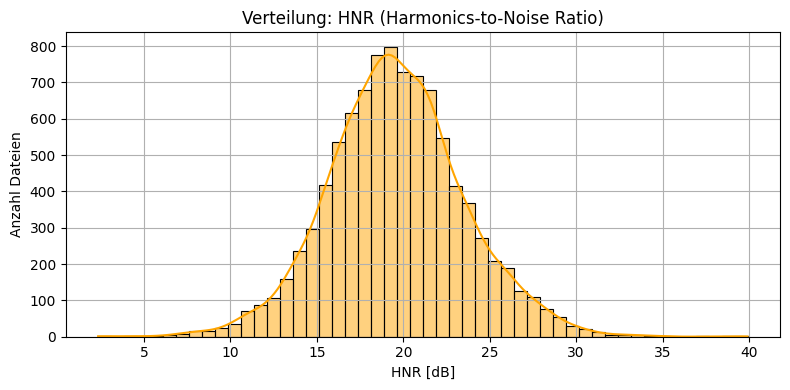

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature].dropna(), bins=50, kde=True, color="orange")
plt.title("Verteilung: HNR (Harmonics-to-Noise Ratio)")
plt.xlabel("HNR [dB]")
plt.ylabel("Anzahl Dateien")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in {feature}: {len(outliers)}")
print(f"Minimum: {df[feature].min():.2f}")
print(f"Maximum: {df[feature].max():.2f}")

Potenzielle Ausreißer in hnr: 159
Minimum: 2.34
Maximum: 39.92


## 06 Log Energy

In [18]:
feature = "log_energy"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean        6.814579
std         0.583858
min         4.023183
25%         6.440919
50%         6.826876
75%         7.211589
max         9.847092
Name: log_energy, dtype: float64


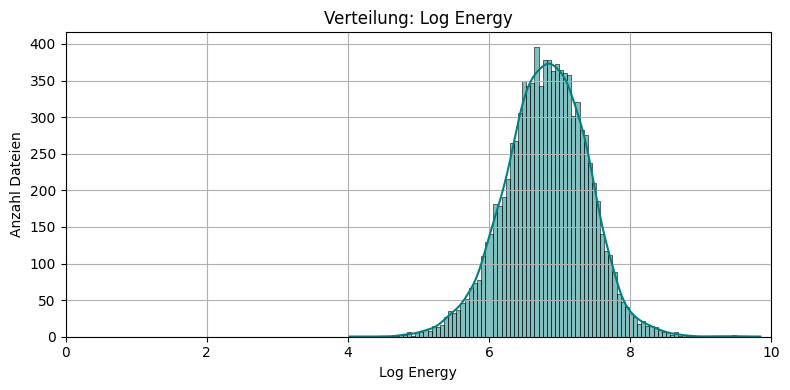

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature].dropna(), bins=100, kde=True, color="teal")
plt.title("Verteilung: Log Energy")
plt.xlabel("Log Energy")
plt.ylabel("Anzahl Dateien")
plt.xlim(0,10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in {feature}: {len(outliers)}")
print(f"Minimum: {df[feature].min():.4f}")
print(f"Maximum: {df[feature].max():.4f}")

Potenzielle Ausreißer in log_energy: 116
Minimum: 4.0232
Maximum: 9.8471


## 07 Loudness Range

In [21]:
feature = "loudness_range"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean       61.298467
std        22.676583
min         0.000000
25%        55.331991
50%        59.373356
75%        64.736929
max       494.469162
Name: loudness_range, dtype: float64


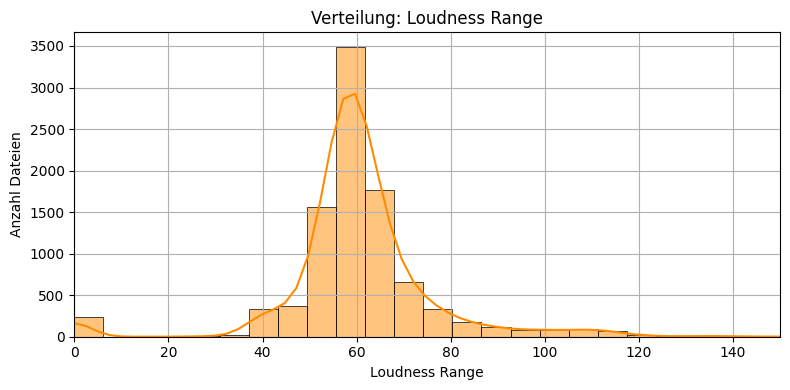

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature].dropna(), bins=80, kde=True, color="darkorange")
plt.title("Verteilung: Loudness Range")
plt.xlabel("Loudness Range")
plt.ylabel("Anzahl Dateien")
plt.xlim(0,150)
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in {feature}: {len(outliers)}")
print(f"Minimum: {df[feature].min():.4f}")
print(f"Maximum: {df[feature].max():.4f}")

Potenzielle Ausreißer in loudness_range: 1252
Minimum: 0.0000
Maximum: 494.4692


## 08 MFCC

In [24]:
mean_cols = [f"mfcc_stat_{i}" for i in range(1, 14)]
df[mean_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
mfcc_stat_1,9472.0,-274.444364,47.427208,-503.755070,-304.372883,-268.633950,-241.070650,-59.063606
mfcc_stat_2,9472.0,77.607559,18.358146,-2.405995,66.568448,77.424913,89.046557,155.610660
mfcc_stat_3,9472.0,8.052747,14.396885,-47.475120,-1.809671,8.491174,17.235025,66.514830
mfcc_stat_4,9472.0,26.441602,12.905048,-34.509808,19.298413,28.267233,35.511981,61.488716
mfcc_stat_5,9472.0,-3.764427,9.199140,-36.240845,-9.657724,-4.594513,1.717121,37.355430
mfcc_stat_6,9472.0,-0.877464,7.886972,-38.473362,-6.035959,-1.028549,3.358246,33.954933
mfcc_stat_7,9472.0,-12.743532,6.817108,-43.150950,-16.874288,-13.217868,-8.774856,14.164841
mfcc_stat_8,9472.0,-7.085412,6.265566,-32.221672,-10.988054,-7.392191,-3.643555,28.024143
mfcc_stat_9,9472.0,-8.798989,5.817878,-35.063538,-11.800688,-8.097098,-5.241031,14.592017
mfcc_stat_10,9472.0,-3.770040,5.065116,-29.824608,-6.704306,-3.789183,-0.767863,17.752003


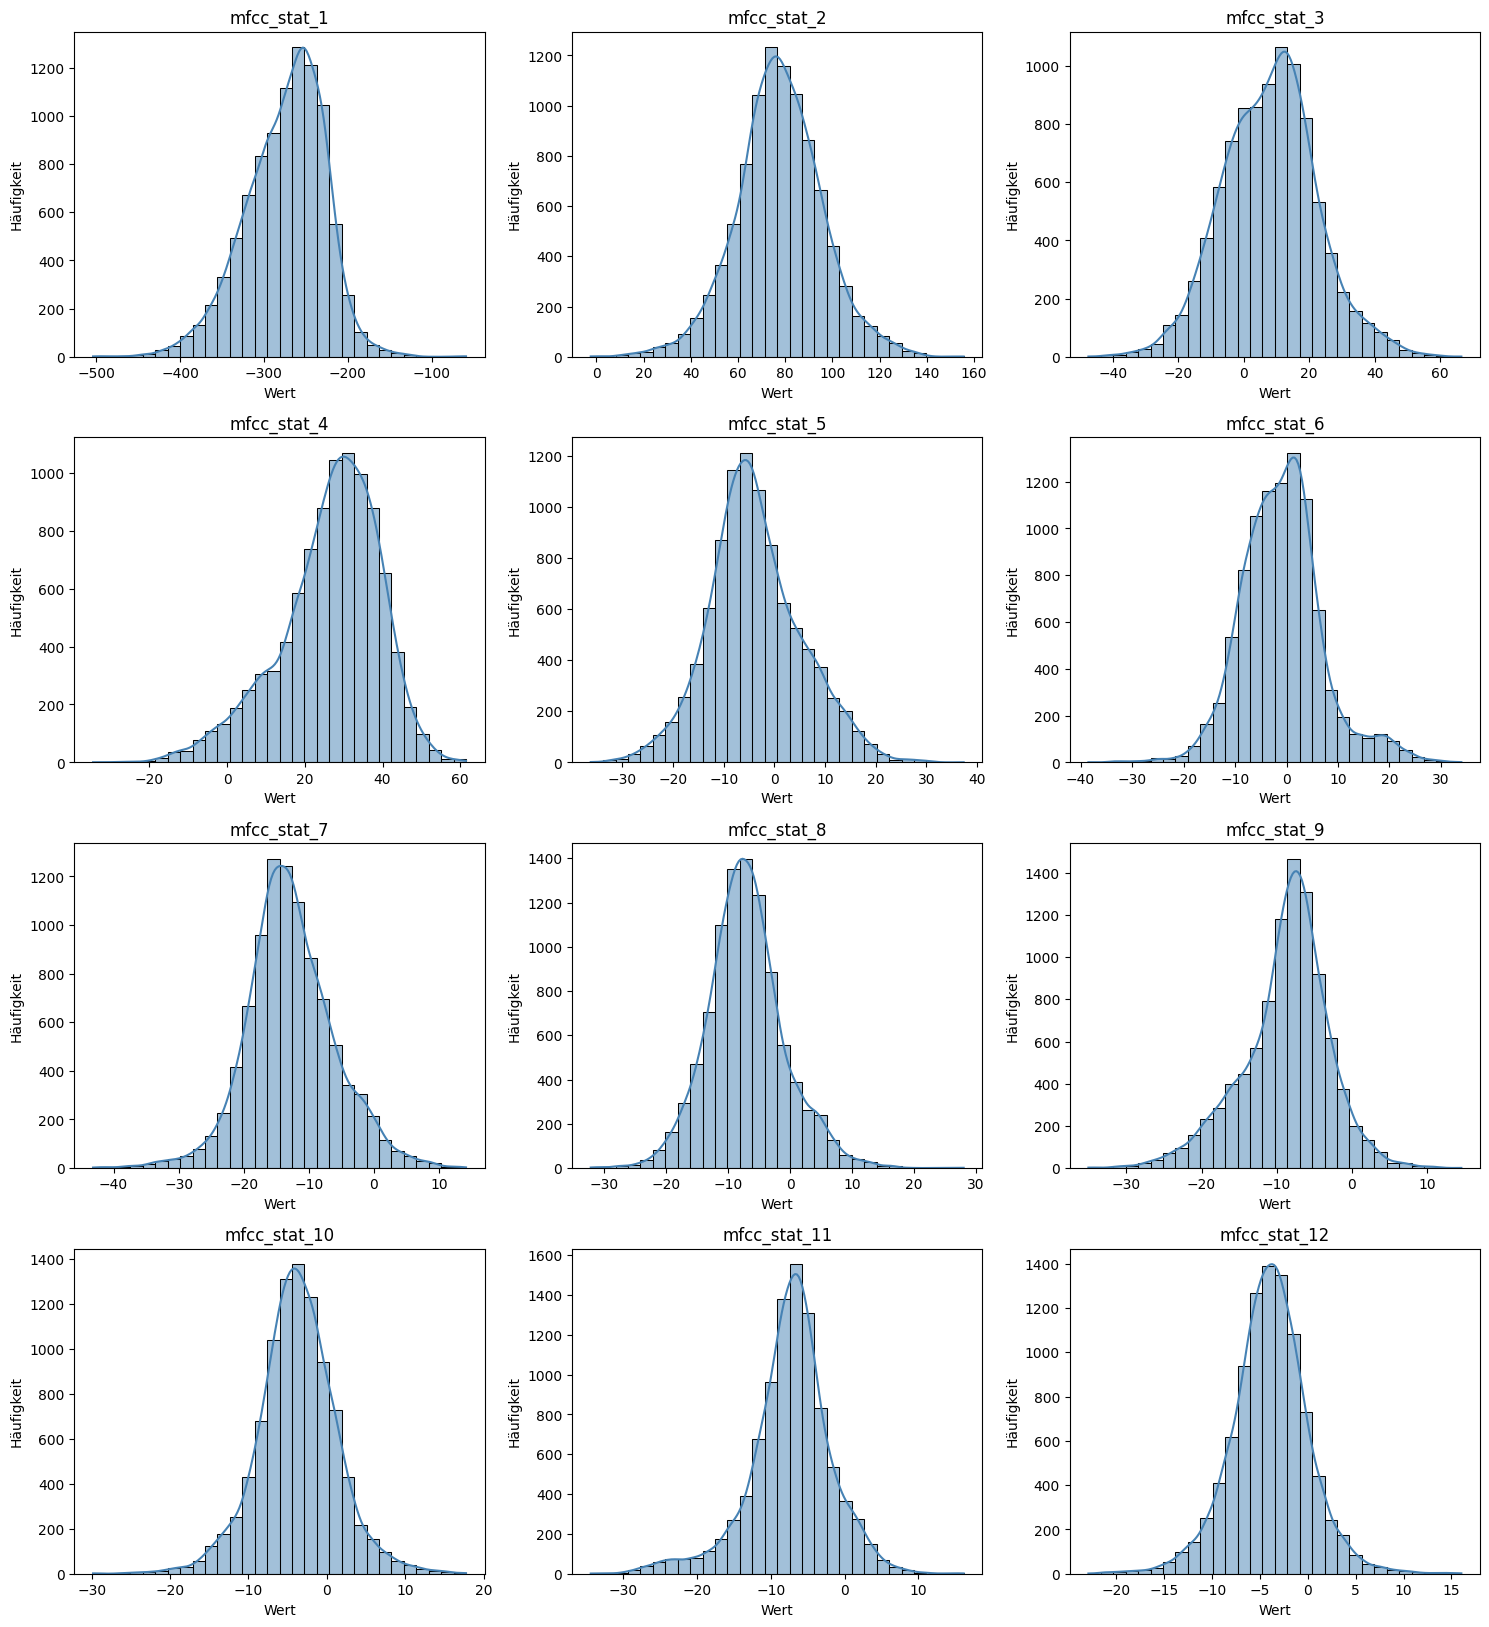

In [25]:
# Liste der ersten 13 MFCC-Mittelwerte
mfcc_mean_cols = [f"mfcc_stat_{i}" for i in range(1, 13)]

# Plots anlegen
plt.figure(figsize=(15, 20))
for i, col in enumerate(mfcc_mean_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="steelblue")
    plt.title(col)
    plt.xlabel("Wert")
    plt.ylabel("Häufigkeit")

plt.tight_layout()
plt.show()

## 09 Phoneme Entropy

In [26]:
feature = "phoneme_entropy"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 450
count    9022.000000
mean        5.750692
std         0.443860
min         2.992785
25%         5.476428
50%         5.767328
75%         6.026548
max         7.500970
Name: phoneme_entropy, dtype: float64


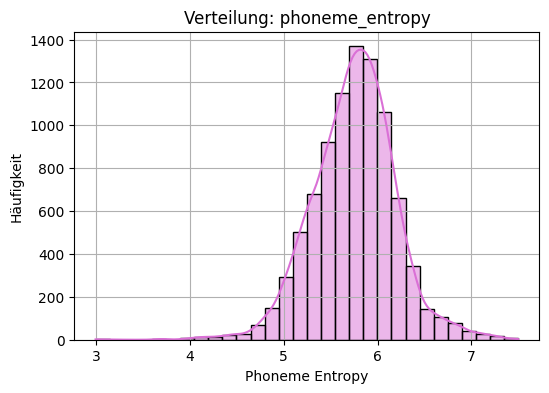

In [27]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color="orchid")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Phoneme Entropy")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.show()

In [28]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 206
Min/Max: 2.992785 7.5009704


## 10 Reverberation

In [29]:
feature = "rt60_reverberation"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean        3.913583
std         1.544332
min         0.316875
25%         2.853500
50%         3.726750
75%         4.725750
max        20.089500
Name: rt60_reverberation, dtype: float64


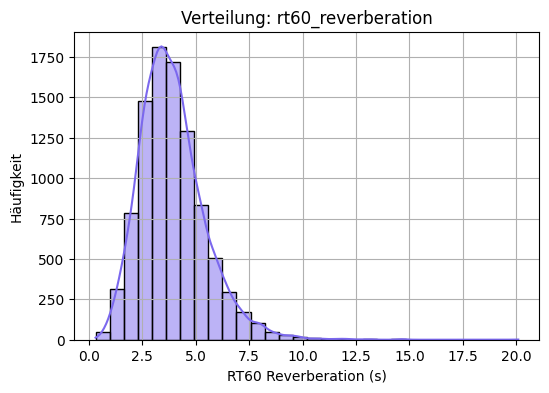

In [30]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color="mediumslateblue")
plt.title(f"Verteilung: {feature}")
plt.xlabel("RT60 Reverberation (s)")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.show()

In [30]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 452
Min/Max: 0.0168749999999997 31.877125


## 11 RMS

In [31]:
feature = "rms"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean        0.104615
std         0.027697
min         0.024598
25%         0.085682
50%         0.101977
75%         0.120609
max         0.363774
Name: rms, dtype: float64


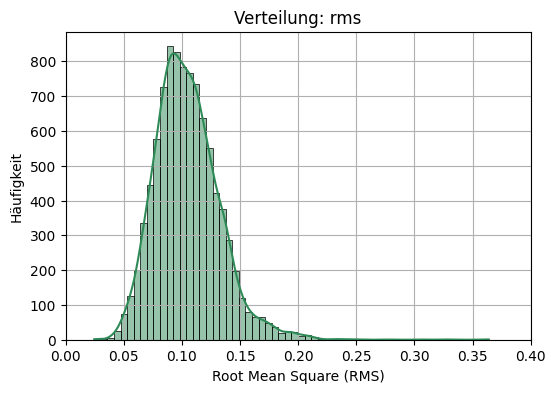

In [32]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=60, kde=True, color="seagreen")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Root Mean Square (RMS)")
plt.ylabel("Häufigkeit")
plt.xlim(0,0.4)
plt.grid(True)
plt.show()

In [33]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 190
Min/Max: 0.02459784 0.36377418


## 12 SNR

In [34]:
feature = "snr"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean       32.781214
std        22.025256
min        -9.037806
25%        21.439558
50%        32.044455
75%        38.738262
max       377.825813
Name: snr, dtype: float64


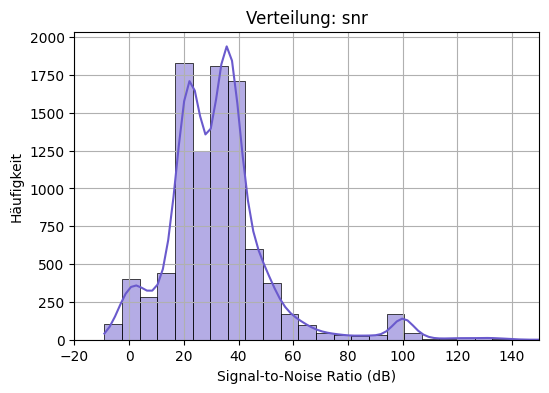

In [35]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=60, kde=True, color="slateblue")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Signal-to-Noise Ratio (dB)")
plt.ylabel("Häufigkeit")
plt.xlim(-20,150)
plt.grid(True)
plt.show()

In [36]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 491
Min/Max: -9.037806391716003 377.825813293457


## 13 Spectral Bandwidth

In [37]:
feature = "spectral_bandwidth"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean     1648.720198
std       189.046520
min       626.205633
25%      1548.095006
50%      1653.584951
75%      1763.756162
max      2385.164484
Name: spectral_bandwidth, dtype: float64


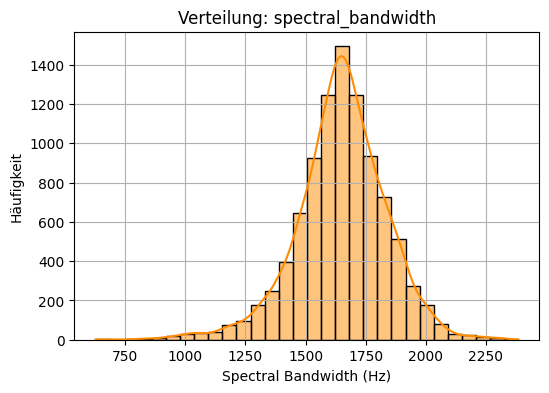

In [38]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color="darkorange")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Spectral Bandwidth (Hz)")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.show()

In [39]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 318
Min/Max: 626.2056329000153 2385.164484335092


## 14 Spectral Centroid

In [40]:
feature = "spectral_centroid"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean     1947.663820
std       319.679532
min       569.718702
25%      1757.618981
50%      1950.215984
75%      2132.306073
max      3531.635350
Name: spectral_centroid, dtype: float64


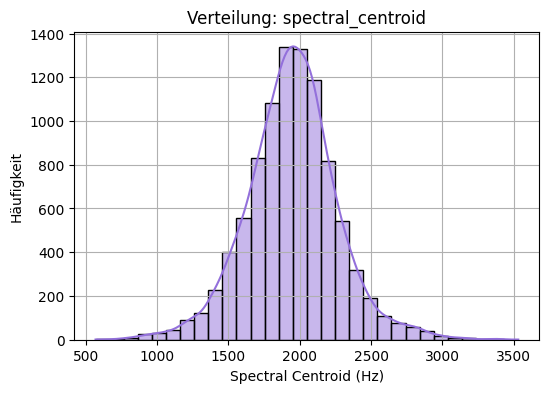

In [41]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color="mediumpurple")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Spectral Centroid (Hz)")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.show()

In [42]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 317
Min/Max: 569.7187019112768 3531.635350296588


## 15 Spectral Contrast

In [43]:
# Feature-Name
feature = "spectral_contrast"

# 1. Umwandeln der Strings (ohne Kommas) zu Arrays
df[feature] = df[feature].apply(
    lambda x: np.fromstring(x.strip("[]"), sep=" ") if isinstance(x, str) else np.array(x)
)

# 2. Zu DataFrame umwandeln für separate Spalten
contrast_array = np.vstack(df[feature].values)
contrast_df = pd.DataFrame(contrast_array, columns=[f"{feature}_band{i+1}" for i in range(contrast_array.shape[1])])

# 3. Statistische Übersicht je Band
display(contrast_df.describe().T)



,count,mean,std,min,25%,50%,75%,max
spectral_contrast_band1,9472.0,21.771084,1.519164,14.477681,20.941388,21.928683,22.641449,28.321564
spectral_contrast_band2,9472.0,14.797845,1.331386,10.774310,13.912964,14.693627,15.590888,21.844763
spectral_contrast_band3,9472.0,17.757304,1.490701,13.201581,16.658563,17.641686,18.650179,24.694347
spectral_contrast_band4,9472.0,17.198668,1.001164,13.058872,16.643887,17.154470,17.699168,25.575730
spectral_contrast_band5,9472.0,18.143436,1.331385,14.362403,17.283106,17.802678,18.704515,26.283653
spectral_contrast_band6,9472.0,22.275874,2.274033,14.739034,20.740153,22.183650,23.666118,45.685029
spectral_contrast_band7,9472.0,53.133238,2.577364,29.559861,52.417812,53.313380,54.287070,64.191548


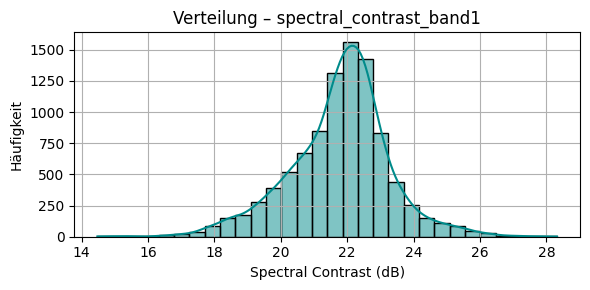

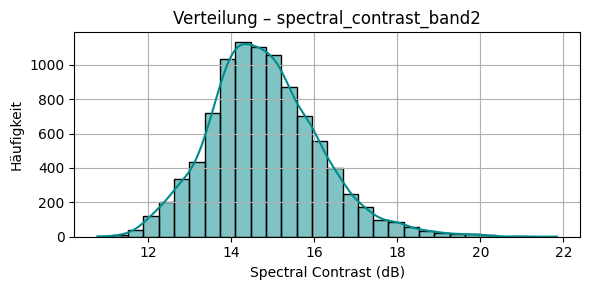

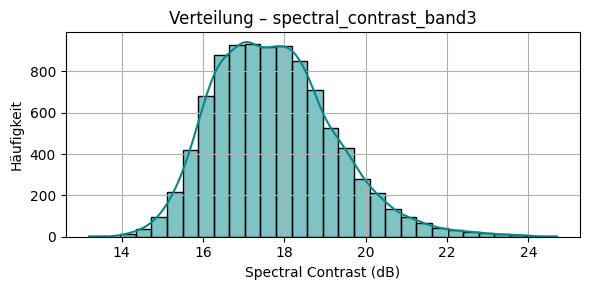

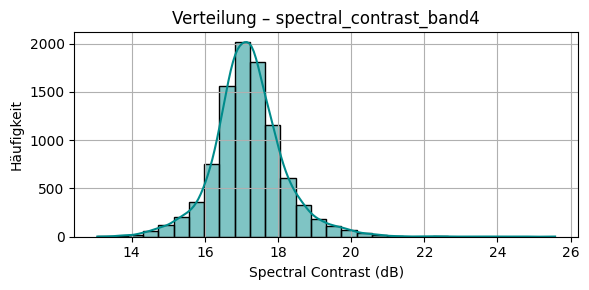

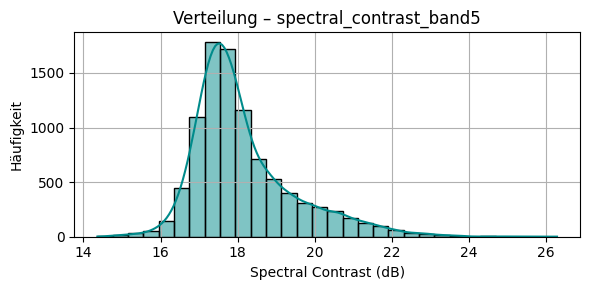

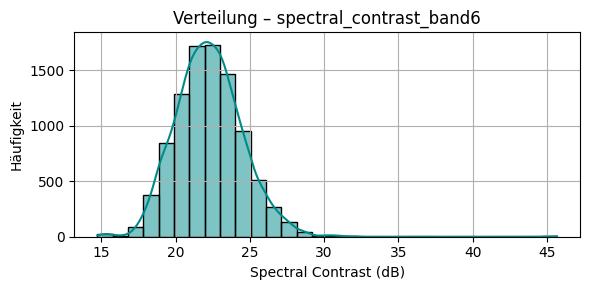

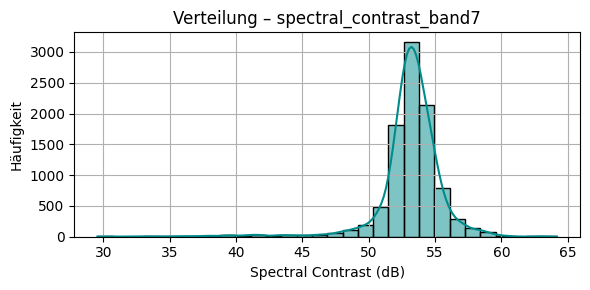

In [44]:
# 4. Histogramme pro Frequenzband
import matplotlib.pyplot as plt
import seaborn as sns

for col in contrast_df.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(contrast_df[col], bins=30, kde=True, color="#008B8B")
    plt.title(f"Verteilung – {col}")
    plt.xlabel("Spectral Contrast (dB)")
    plt.ylabel("Häufigkeit")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 16 Spectral Entropy

In [45]:
feature = "spectral_entropy"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean        3.400762
std         0.300984
min         1.562909
25%         3.234115
50%         3.415393
75%         3.586468
max         4.529316
Name: spectral_entropy, dtype: float64


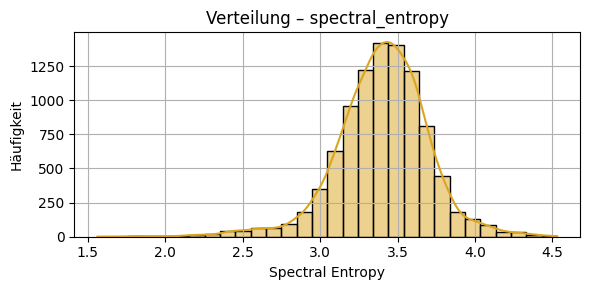

In [46]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=30, kde=True, color = "#DAA520")
plt.title(f"Verteilung – {feature}")
plt.xlabel("Spectral Entropy")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 339
Min/Max: 1.5629092 4.529316


## 17 Spectral Flatness

In [48]:
feature = "spectral_flatness"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean        0.048092
std         0.042181
min         0.001034
25%         0.030312
50%         0.039388
75%         0.051248
max         0.587997
Name: spectral_flatness, dtype: float64


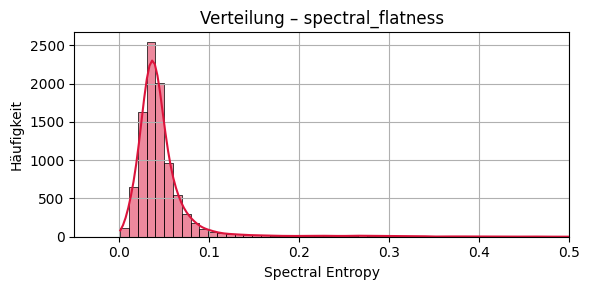

In [49]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=60, kde=True, color = "#DC143C")
plt.title(f"Verteilung – {feature}")
plt.xlabel("Spectral Entropy")
plt.ylabel("Häufigkeit")
plt.xlim(-0.05,0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 661
Min/Max: 0.0010343244 0.5879966


## 18 Spectral Rolloff

In [51]:
feature = "spectral_rolloff"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean     3670.242267
std       587.362277
min      1100.151210
25%      3333.511137
50%      3695.418074
75%      4046.871929
max      6298.420330
Name: spectral_rolloff, dtype: float64


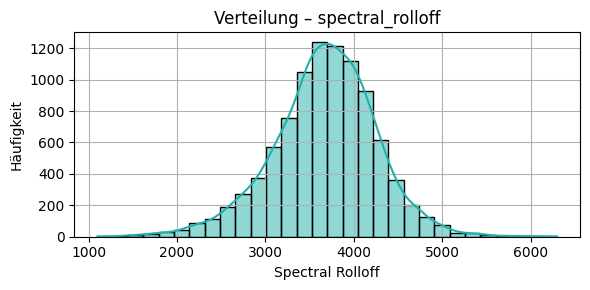

In [52]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=30, kde=True, color = "#20B2AA")
plt.title(f"Verteilung – {feature}")
plt.xlabel("Spectral Rolloff")
plt.ylabel("Häufigkeit")
#plt.xlim(-0.05,0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 240
Min/Max: 1100.1512096774193 6298.42032967033


## 19 Spectral Flatness

In [54]:
feature = "spectral_flatness"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean        0.048092
std         0.042181
min         0.001034
25%         0.030312
50%         0.039388
75%         0.051248
max         0.587997
Name: spectral_flatness, dtype: float64


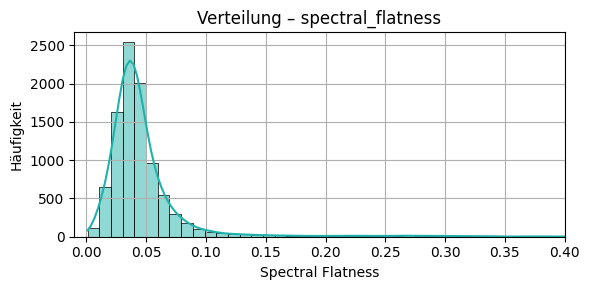

In [55]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=60, kde=True, color = "#20B2AA")
plt.title(f"Verteilung – {feature}")
plt.xlabel("Spectral Flatness")
plt.ylabel("Häufigkeit")
plt.xlim(-0.01,0.4)
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 661
Min/Max: 0.0010343244 0.5879966


## 20 Voice Activity Detection (VAD)

In [57]:
feature = "vad"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean       52.777926
std        11.587077
min         5.150215
25%        45.483808
50%        54.347826
75%        61.480571
max        90.909091
Name: vad, dtype: float64


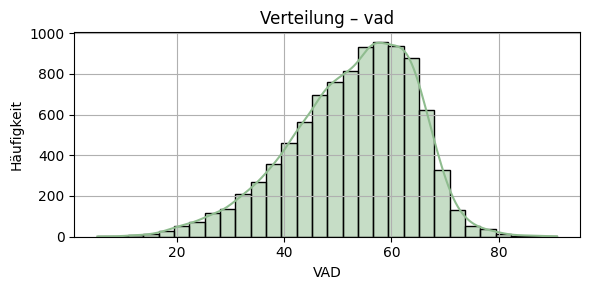

In [58]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=30, kde=True, color = "#8FBC8F")
plt.title(f"Verteilung – {feature}")
plt.xlabel("VAD")
plt.ylabel("Häufigkeit")
#plt.xlim(-0.01,0.4)
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 99
Min/Max: 5.150214592274678 90.9090909090909


## 21 Zero Crossing Rate (ZCR)

In [60]:
feature = "zcr"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    9472.000000
mean        0.168153
std         0.037386
min         0.035029
25%         0.144430
50%         0.165880
75%         0.188062
max         0.458688
Name: zcr, dtype: float64


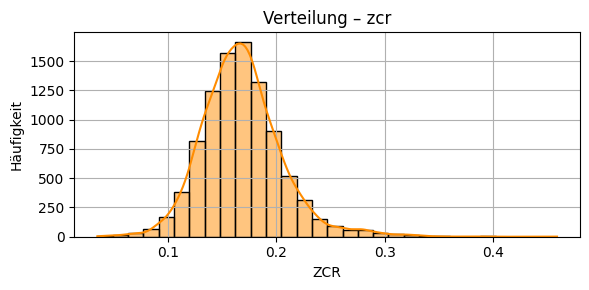

In [61]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=30, kde=True, color = "#FF8C00")
plt.title(f"Verteilung – {feature}")
plt.xlabel("ZCR")
plt.ylabel("Häufigkeit")
#plt.xlim(-0.01,0.4)
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 302
Min/Max: 0.0350294237012987 0.4586884469696969
